## Keras MNIST Fashion Model Builder Example

Single fully connected hidden layer exported for prediction on device with tensor/io. Exported using the `SavedModelBuilder` api.

Based on https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

import PIL.Image as Image
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# The saved model builder api cannot be used with eager execution

tf.compat.v1.disable_eager_execution()

In [3]:
def enable_memory_growth():
    physical_devices = tf.config.experimental.list_physical_devices('GPU') 
    try: 
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        # tf.config.gpu.set_per_process_memory_growth(True)
        # tf.config.gpu.set_per_process_memory_fraction(0.75)
    except: 
        print('Invalid device or cannot modify virtual devices once initialized.')

        
if "TF_GPU_GROWTH" in os.environ:
    print("Enabling GPU memory growth")
    enable_memory_growth()

Enabling GPU memory growth
Invalid device or cannot modify virtual devices once initialized.


## Fashion MNIST

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

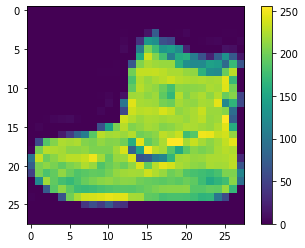

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()    

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

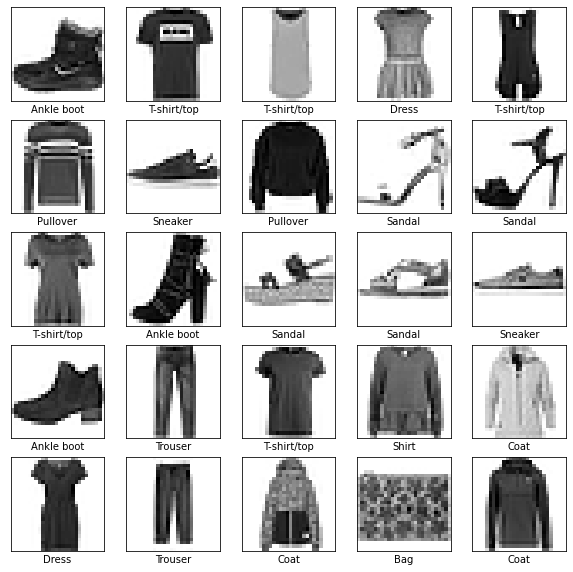

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [9]:
def make_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model

In [10]:
model = make_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5099 - accuracy: 0.8199
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3783 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3387 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3144 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2980 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2805 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2699 - accuracy: 0.8996
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2570 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2485 - accuracy: 0.9073
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8867


In [16]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([8.4840540e-06, 3.3130330e-09, 2.6293819e-07, 5.7798673e-09,
       3.7885923e-07, 1.4314454e-02, 8.9490586e-06, 2.2615902e-02,
       4.5405957e-07, 9.6305102e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

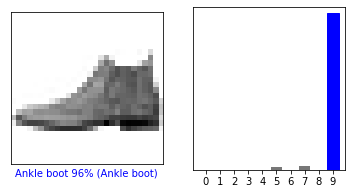

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

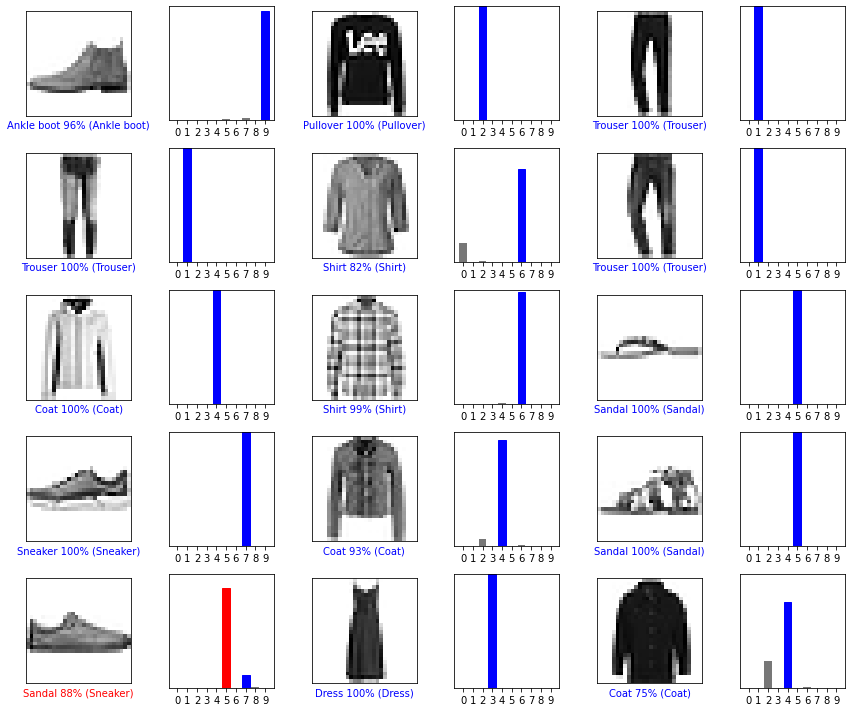

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Export with Saved Model Builder

Note that the saved_model builder is deprecated and will be removed in a future version. This code must be run with eager execution disabled:

```
tf.compat.v1.disable_eager_execution()
```

@Meelis recommended this approach, see also:

- https://towardsdatascience.com/deploying-kaggle-solution-with-tensorflow-serving-part-1-of-2-803391c9648
- https://www.tensorflow.org/api_docs/python/tf/compat/v1/saved_model

In [23]:
print(model.input)
print(model.output)

Tensor("flatten_input:0", shape=(None, 28, 28), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(None, 10), dtype=float32)


In [24]:
BUILDER_PATH='tmp/keras-mnist-fashion-model-builder'
! rm -r 'tmp/keras-mnist-fashion-model-builder'

In [25]:
x_info = tf.compat.v1.saved_model.utils.build_tensor_info(model.input)        
y_info = tf.compat.v1.saved_model.utils.build_tensor_info(model.output)

method_name = tf.compat.v1.saved_model.signature_constants.PREDICT_METHOD_NAME

signature = tf.compat.v1.saved_model.signature_def_utils.build_signature_def(
    inputs={ 'x': x_info },
    outputs={ 'y': y_info },
    method_name=method_name
)

builder = tf.compat.v1.saved_model.builder.SavedModelBuilder(BUILDER_PATH)

builder.add_meta_graph_and_variables(
    sess=tf.compat.v1.keras.backend.get_session(),
    tags=[tf.compat.v1.saved_model.tag_constants.SERVING],
    signature_def_map={
        tf.compat.v1.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature
    }
)

builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: tmp/keras-mnist-fashion-model-builder/saved_model.pb


b'tmp/keras-mnist-fashion-model-builder/saved_model.pb'

### Results

In [26]:
! saved_model_cli show --all --dir tmp/keras-mnist-fashion-model-builder/


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['x'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28)
        name: flatten_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['y'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: dense_1/BiasAdd:0
  Method name is: tensorflow/serving/predict


### Tensor/IO

Note in the corresponding model.json that the name and shape of the inputs and outputs matches the values you see in the signature definition. Take special care to note that the name is taken from the layer's name and not from the key in the inputs or outputs dictionary:

```
inputs['x'] tensor_info:
    dtype: DT_FLOAT
    shape: (-1, 28, 28)
    name: flatten_input:0

outputs['y'] tensor_info:
    dtype: DT_FLOAT
    shape: (-1, 10)
    name: dense_1/BiasAdd:0
```

In [27]:
! cat model.json

{
	"name": "Keras MNIST Fashion Model Builder Example",
	"details": "Basic Keras Model for Fashion MNSIT dataset exported for prediction using the keras model builder api",
	"id": "keras-mnist-clothing-save-model",
	"version": "1",
	"author": "doc.ai",
	"license": "Apache License. Version 2.0 http://www.apache.org/licenses/LICENSE-2.0",
	"model": {
		"file": "predict",
		"quantized": false,
		"type": "mnist.fashion.keras",
		"backend": "tensorflow",
		"modes": ["predict"]
	},
	"inputs": [
		{
			"name": "flatten_input",
			"type": "array",
			"shape": [-1,28,28]
		}
	],
	"outputs": [
		{
			"name": "dense_1/BiasAdd",
			"type": "array",
			"shape": [-1,10]
		}
	]
}

## Notes

**TF 2.2**

For the TF 2.2 version of this model I must also whitelist the `StaticRegexFullMatch` op (*core/kernels/regex_full_match.op*). However that file imports `re2/re2.h`, which the build files do not make available.

RE2 is a regular expression library that would also have to either be compiled into the build or made available as a third party library as nsync and protobuf are.

It looks like this op is needed to check if the model is being saved to an Amazon S3 bucket. This is the node that uses it:

```
node {
      name: "save/StaticRegexFullMatch"
      op: "StaticRegexFullMatch"
      input: "save/Const"
      device: "/device:CPU:*"
      attr {
        key: "_output_shapes"
        value {
          list {
            shape {
            }
          }
        }
      }
      attr {
        key: "pattern"
        value {
          s: "^s3://.*"
        }
      }
    }
```

We have chosen to temporarily enable this op while disabling its use of the RE2 library in such a manner that the op will always return `false`, i.e., no regex match for the string.

Until we have permanently solved this problem by including RE2 in our on-device builds of TensorFlow, do not make calls to `tf.strings.regex_full_match` in your models. If you do you will see a warning in the on-device console logs that this op, although enabled, does not behave correctly.